In [1]:
%pylab inline
import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [2]:
%ls  -lrth AllEvtsOldPres | grep -v npz | tail

total 19G
drwxr-xr-x 2 laurent laurent  32K juin  26 17:35 Fitters/
-rw-r--r-- 1 laurent laurent 719K juin  26 17:55 0626_dfscores_100k.txt
-rw-r--r-- 1 laurent laurent 943K juin  26 17:55 0626_dfscores100k.txt
-rw-r--r-- 1 laurent laurent  32K juin  26 17:55 0626_i_test_tt_30files.npy


In [2]:
dfW=pd.read_csv("Fitters/0630_dfscores_50k_50f_W.txt", names=["pseudoindex", "nvar", "nsamp", "score", "time", "alpha", "fitter"])
dfSGD=dfW[dfW.fitter=="SGD"]
dfRidge=dfW[dfW.fitter=="ridge"]

dfW.head()



,pseudoindex,nvar,nsamp,score,time,alpha,fitter
0,0,100,100,0.519460,0.035670,681.292069,ridge
1,0,100,100,0.496304,1.378718,0.011288,SGD
2,0,100,158,0.510497,0.028369,681.292069,ridge
3,0,100,158,0.506635,0.195187,0.127427,SGD
4,0,158,100,0.515088,0.018189,681.292069,ridge


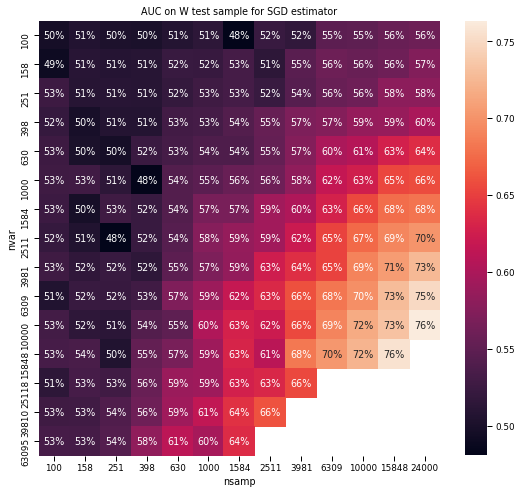

In [17]:
import seaborn as sns
sns.set_context("paper")
figsize(9, 8)
dfpiv=dfSGD[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score")
sns.heatmap(dfpiv, annot=True, fmt=".0%")
title("AUC on W test sample for SGD estimator")
savefig("SGD_W_2dfit")

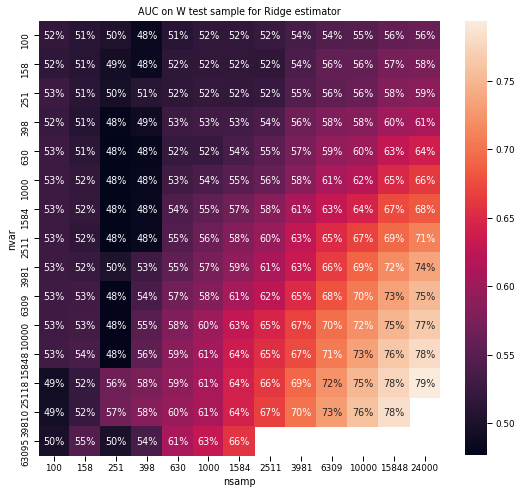

In [18]:
import seaborn as sns
sns.set_context("paper")
figsize(9, 8)

dfpiv=dfRidge[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score")
sns.heatmap(dfpiv, annot=True, fmt=".0%")
title("AUC on W test sample for Ridge estimator")
savefig("Ridge_W_2dfit")

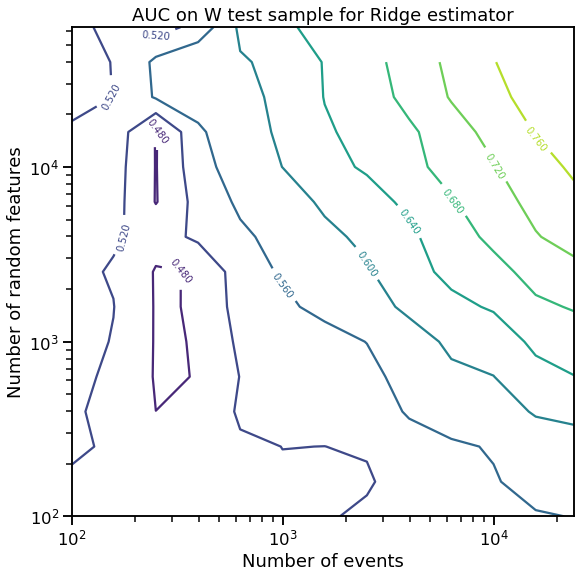

In [19]:
sns.set_context("talk")
figsize(9, 9)
CS=contour(dfRidge.nsamp.unique(), dfRidge.nvar.unique(), dfRidge[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score"))
xscale("log")
yscale("log")
clabel(CS, inline=1, fontsize=10)
xlabel("Number of events")
ylabel("Number of random features")
title("AUC on W test sample for Ridge estimator")
savefig("Ridge_W_contour")

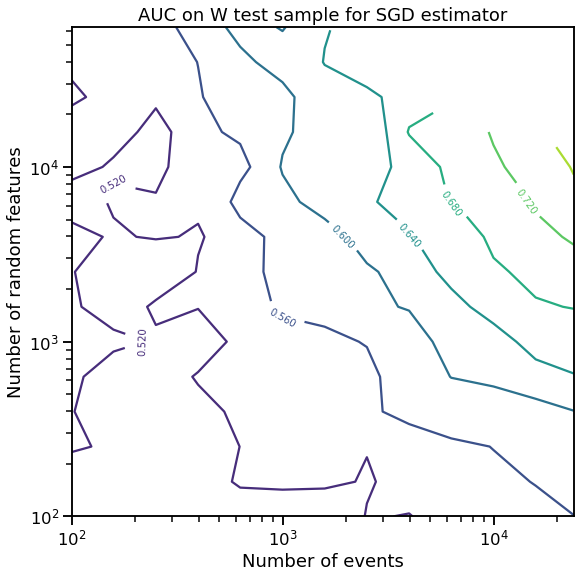

In [20]:
sns.set_context("talk")
figsize(9, 9)
CS=contour(dfSGD.nsamp.unique(), dfSGD.nvar.unique(), dfSGD[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score"))
xscale("log")
yscale("log")
clabel(CS, inline=1, fontsize=10)
xlabel("Number of events")
ylabel("Number of random features")
title("AUC on W test sample for SGD estimator")
savefig("SGD_W_contour")

,nvar,nsamp,score
0,100,100,0.517180
1,158,100,0.520804
2,251,100,0.529552
3,398,100,0.557052
4,630,100,0.540416


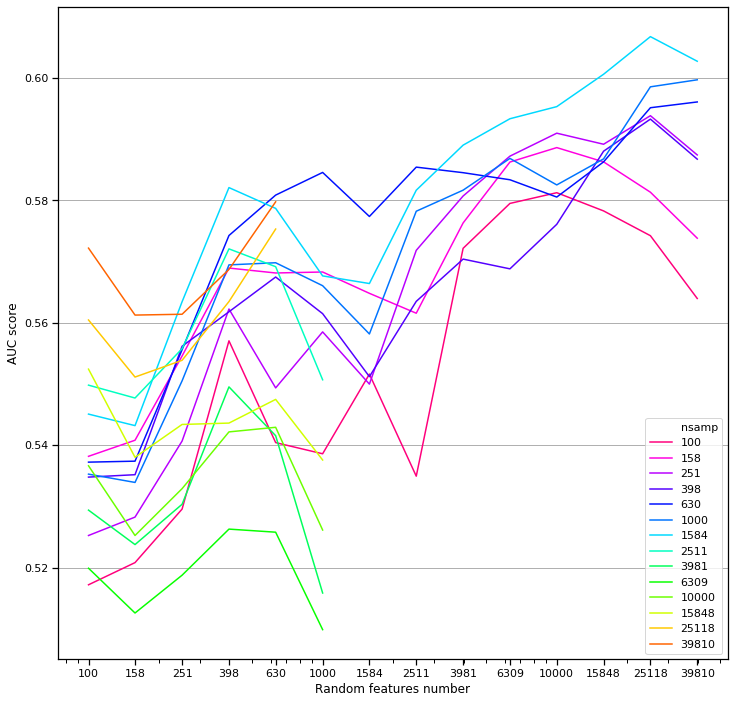

In [11]:
figsize(12, 12)

ncol=len(dfscore.nsamp.unique())

ax=sns.lineplot(data=dfscore, x="nvar", y="score", 
                hue="nsamp", markers=True, legend="full",
                palette=sns.color_palette("hsv_r", ncol))
#sns.lineplot(data=dfscore, x="nvar", y="score", hue="fitter", markers=True)


xlabel("Random features number")
xscale("log")
xticks(dfscore.nvar.unique())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ylabel("AUC score")
grid(axis="y")
#ylim(0.55, 0.71)

dfscore.head()

14

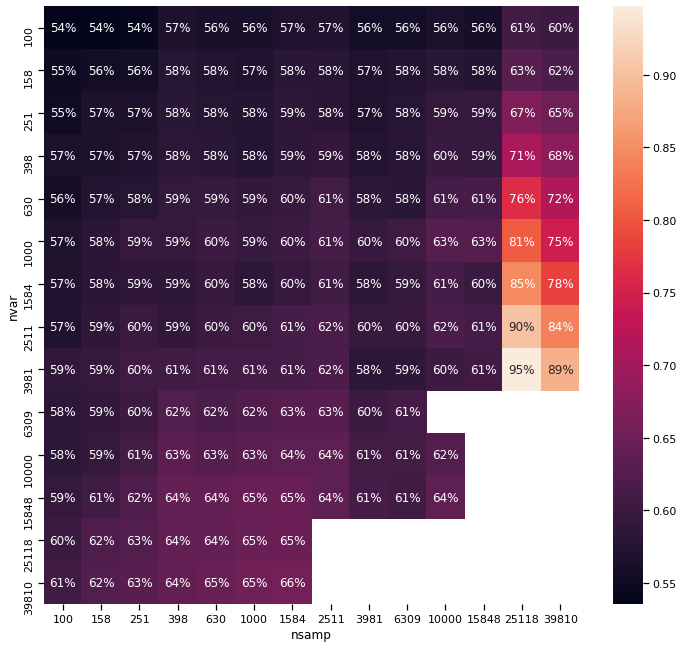

In [16]:
figsize(12, 11)
dfpiv=dfscore[["nvar", "nsamp", "score"]].pivot("nvar", "nsamp", "score")
sns.heatmap(dfpiv, annot=True, fmt=".0%")

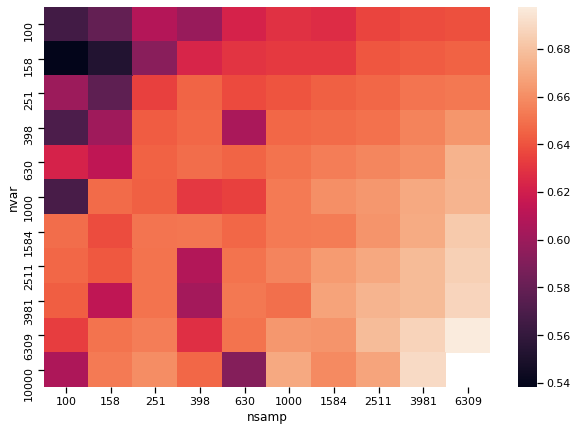

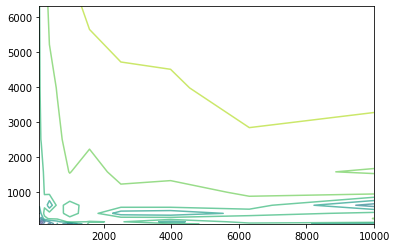

In [6]:
X=dfpiv.columns.levels[1].values
Y=dfpiv.index.values
Z=dfpiv.values
Xi,Yi = np.meshgrid(X, Y)
#map=plt.cm.jet
plt.contour(Yi, Xi, Z, alpha=0.7)

Text(0.5, 1.0, 'ROC curve, SGD (alpha=0.1), 10K events, 2K variables')

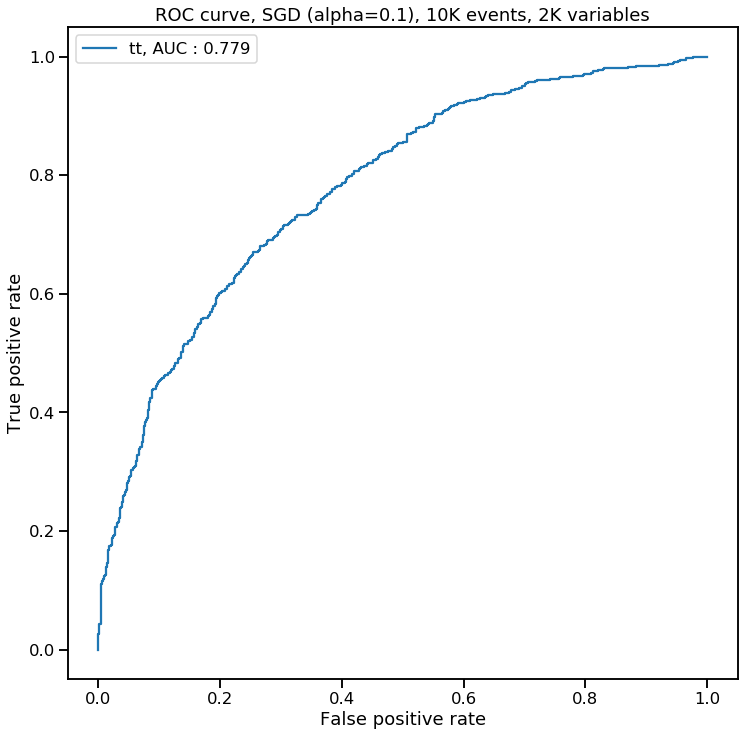

In [12]:

X_prob=ridge.predict(X_test)

figsize(12, 12)
import seaborn as sns
sns.set_context("talk")

Xpc=X_prob
ypc=y_test
roc=roc_curve(ypc, Xpc)
score=roc_auc_score(ypc, Xpc)
plot(roc[0], roc[1], label=f"tt, AUC : {score:.3f}")
    
legend()
xlabel("False positive rate")
ylabel("True positive rate")
title("ROC curve, SGD (alpha=0.1), 10K events, 2K variables")